In [ ]:
#import essentials
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd


In [ ]:
#this is a test to replace next cell
from google_drive_downloader import GoogleDriveDownloader as gdd

gdd.download_file_from_google_drive(file_id='1f7uslI-ZHidriQFZR966_aILjlkgDN76',
dest_path='content/eye_gender_data.zip',
unzip=True)

Unzipping...Done.


In [ ]:
#upload data 
"""
from google.colab import files
from zipfile import ZipFile

zip_file = files.upload()
"""

'\nfrom google.colab import files\nfrom zipfile import ZipFile\n\nzip_file = files.upload()\n'

In [ ]:
"""
with ZipFile("eye_gender_data.zip", 'r') as zip:
  zip.extractall()
  print('Done')
  """

'\nwith ZipFile("eye_gender_data.zip", \'r\') as zip:\n  zip.extractall()\n  print(\'Done\')\n  '

90


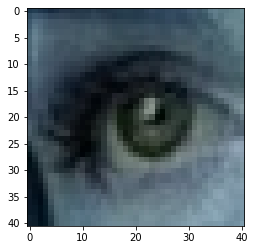

In [ ]:
import os 
import cv2
import glob
path = "content/eye_gender_data/train/Image_"

train_images = []
test_images = []

min_shape = 41
n = 0
for i in range(1,9220+1):
   a = cv2.imread(path + f"{i}" + ".jpg", 1)
   if a.shape[0] == min_shape:
     n += 1
     plt.imshow(a)
   a = cv2.resize(src = a, dsize=(70,70))
   train_images.append(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))
print(n)
train_labels = pd.read_csv("content/eye_gender_data/Training_set.csv")

path = "content/eye_gender_data/test/Image_"
for i in range(1, 2305+1):
  a = np.array(cv2.imread(path + f"{i}" + ".jpg", 1))
  a = cv2.resize(src = a, dsize = (70, 70))
  test_images.append(cv2.cvtColor(a, cv2.COLOR_BGR2RGB))

test_labels = pd.read_csv("content/eye_gender_data/Testing_set.csv")


In [ ]:
#check the data ie. print it
test_labels

,filename
0,Image_1.jpg
1,Image_2.jpg
2,Image_3.jpg
3,Image_4.jpg
4,Image_5.jpg
...,...
2300,Image_2301.jpg
2301,Image_2302.jpg
2302,Image_2303.jpg
2303,Image_2304.jpg


In [ ]:
train_labels

,filename,label
0,Image_1.jpg,male
1,Image_2.jpg,female
2,Image_3.jpg,female
3,Image_4.jpg,female
4,Image_5.jpg,male
...,...,...
9215,Image_9216.jpg,male
9216,Image_9217.jpg,male
9217,Image_9218.jpg,male
9218,Image_9219.jpg,male


In [ ]:
y_train = train_labels.label
transform = {"male": 0, "female": 1}
y_train = np.array([transform[elt] for elt in train_labels.label])
y_train

array([0, 1, 1, ..., 0, 0, 1])

(70, 70, 3)

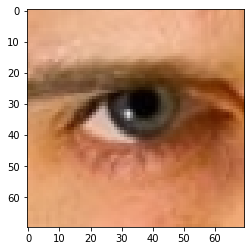

In [ ]:
image =train_images[120]
plt.imshow(image)
np.array(image).shape

(41, 41, 3)

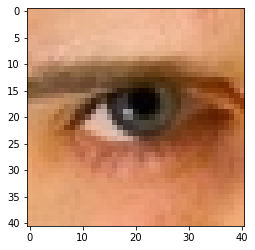

In [ ]:
resized_image = cv2.resize(src = image, dsize=(41,41))
plt.imshow(resized_image)
resized_image.shape

In [ ]:
# normalizing images

train_images_scaled = np.array(train_images)/255.0
train_images_scaled.dtype

dtype('float64')

In [ ]:
#start building the Sequential model based only on Dense layers
INPUT_SHAPE = 70*70
model = tf.keras.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu', input_shape = (INPUT_SHAPE,)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate = 0.3))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(rate = 0.3))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate= 0.0001), loss = 'binary_crossentropy', metrics = 'acc')

In [ ]:
EPOCHS = 100
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,
restore_best_weights=True,
verbose=1)

history = model.fit(train_images_scaled, y_train,
batch_size=32,
callbacks=[es_callback],
validation_split=0.1, epochs=EPOCHS, verbose = 1)

Epoch 1/100
260/260 [==============================] - 5s 5ms/step - loss: 0.6648 - acc: 0.6051 - val_loss: 0.5645 - val_acc: 0.7202
Epoch 2/100
260/260 [==============================] - 1s 4ms/step - loss: 0.5456 - acc: 0.7307 - val_loss: 0.4663 - val_acc: 0.7798
Epoch 3/100
260/260 [==============================] - 1s 4ms/step - loss: 0.4892 - acc: 0.7736 - val_loss: 0.4362 - val_acc: 0.8059
Epoch 4/100
260/260 [==============================] - 1s 4ms/step - loss: 0.4487 - acc: 0.7963 - val_loss: 0.4392 - val_acc: 0.7885
Epoch 5/100
260/260 [==============================] - 1s 4ms/step - loss: 0.4167 - acc: 0.8237 - val_loss: 0.5712 - val_acc: 0.7072
Epoch 6/100
260/260 [==============================] - 1s 4ms/step - loss: 0.4102 - acc: 0.8255 - val_loss: 0.3610 - val_acc: 0.8395
Epoch 7/100
260/260 [==============================] - 1s 4ms/step - loss: 0.3869 - acc: 0.8325 - val_loss: 0.4429 - val_acc: 0.7983
Epoch 8/100
260/260 [==============================] - 1s 4ms/step - 

In [ ]:
print("the best acc I got is 86.88%")

the best acc I got is 86.88%


In [ ]:
#here we will try standarising the training data rather than normalising it 
train_images_scaled = (np.array(train_images) - 127.5) / 127.5
train_images_scaled.shape

(9220, 70, 70, 3)

In [ ]:
#modle based on CNN 
model2 = tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(filters=16, kernel_size= (3,3), input_shape = (70,70,3)))
model2.add(tf.keras.layers.BatchNormalization(momentum= 0.8))
model2.add(tf.keras.layers.LeakyReLU())
model2.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))
model2.add(tf.keras.layers.Conv2D(filters= 32, kernel_size=(3,3)))
model2.add(tf.keras.layers.BatchNormalization(momentum= 0.8))
model2.add(tf.keras.layers.LeakyReLU())
model2.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))



model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(40, kernel_regularizer= tf.keras.regularizers.l2()))
model2.add(tf.keras.layers.LeakyReLU())
#model2.add(tf.keras.layers.Dropout(rate=0.3))
model2.add(tf.keras.layers.Dense(10))
model2.add(tf.keras.layers.LeakyReLU())
#model2.add(tf.keras.layers.Dropout(0.3))

model2.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics= 'acc')
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 68, 68, 16)        448       
_________________________________________________________________
batch_normalization (BatchNo (None, 68, 68, 16)        64        
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 68, 68, 16)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 34, 34, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 32, 32, 32)       

In [ ]:
#checking the shape of data to transform it 
train_images_scaled.shape

(9220, 70, 70, 3)

In [ ]:
train_images_scaled_shaped = train_images_scaled.reshape((9220, 70, 70, 3))

In [ ]:
EPOCHS = 100
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,
restore_best_weights=True,
verbose=1)

history = model2.fit(train_images_scaled_shaped, y_train,
batch_size=32,
callbacks=[es_callback],
validation_split=0.2, 
epochs=EPOCHS, verbose = 1)

Epoch 1/100
231/231 [==============================] - 30s 9ms/step - loss: 0.8049 - acc: 0.8191 - val_loss: 0.4860 - val_acc: 0.8633
Epoch 2/100
231/231 [==============================] - 2s 7ms/step - loss: 0.4369 - acc: 0.8627 - val_loss: 0.5136 - val_acc: 0.8612
Epoch 3/100
231/231 [==============================] - 2s 7ms/step - loss: 0.3638 - acc: 0.8852 - val_loss: 0.3446 - val_acc: 0.8807
Epoch 4/100
231/231 [==============================] - 2s 8ms/step - loss: 0.3290 - acc: 0.8921 - val_loss: 0.2810 - val_acc: 0.9208
Epoch 5/100
231/231 [==============================] - 2s 8ms/step - loss: 0.3012 - acc: 0.9023 - val_loss: 0.3223 - val_acc: 0.8899
Epoch 6/100
231/231 [==============================] - 2s 8ms/step - loss: 0.2947 - acc: 0.9066 - val_loss: 0.3472 - val_acc: 0.8915
Epoch 7/100
231/231 [==============================] - 2s 7ms/step - loss: 0.2988 - acc: 0.9056 - val_loss: 0.2984 - val_acc: 0.9073
Epoch 8/100
231/231 [==============================] - 2s 8ms/step -

In [ ]:
#0.9067 for the first try
#0.9013 second try
#0.9230 3d try
#0.9208
#0.9089
#0.9176
#0.9159
#0.9219

In [ ]:
# transform test data for predictions
test_images_scaled = np.array(test_images)/255.0
test_images_scaled.shape

(2305, 70, 70, 3)

In [ ]:
# standarize test_images
test_images_scaled = (np.array(test_images) - 127.5 ) / 127.5
test_images_scaled.shape

In [ ]:
test_images_scaled_shaped = test_images_scaled

In [ ]:
#make predictions
result = model2.predict(test_images_scaled_shaped)
#result = np.array(["male" if elt<=0.5 else "female" for elt in result])
result

In [ ]:
#save results localy
res = pd.DataFrame(result)

res.columns = ['label']
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv')         
files.download('prediction_results.csv')

In [ ]:
res

In [ ]:
#hyper paramter tuning

# Import KerasRegressor class
from keras.wrappers.scikit_learn import KerasRegressor
# Import the GridSearchCV class
from sklearn.model_selection import GridSearchCV

# Define the model trhough a user-defined function
def create_model(optimizer=tf.keras.optimizers.RMSprop(0.01)):
  model1 = tf.keras.Sequential()
  model1.add(tf.keras.layers.Conv2D(filters=20, kernel_size= (3,3), activation = 'relu', input_shape = (41,41,1)))
  model1.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))
  model1.add(tf.keras.layers.Conv2D(filters= 40, kernel_size=(3,3), activation = 'relu'))
  model1.add(tf.keras.layers.MaxPooling2D(pool_size= (2,2)))

  model1.add(tf.keras.layers.Flatten())
  model1.add(tf.keras.layers.Dense(300, activation='relu'))
  model1.add(tf.keras.layers.Dropout(rate=0.3))
  model1.add(tf.keras.layers.Dense(150, activation= 'relu'))
  model1.add(tf.keras.layers.Dropout(0.3))

  model1.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

  model1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate= 0.001), loss='binary_crossentropy', metrics= 'acc')
  return model1
model = KerasRegressor(build_fn=create_model, verbose=1)

# Define the hyperparameters grid to be validated
batch_size = [10, 30, 60, 100]
epochs = [20,25,30]
param_grid = dict(batch_size=batch_size, nb_epoch=epochs)
model = KerasRegressor(build_fn=create_model, verbose=1)
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1)

# Run the GridSearchCV process
grid_result = grid.fit(train_images_scaled_shaped, y_train, verbose = 1)

# Print the results of the best model
print('Best params: ' + str(grid_result.best_params_))

------------------------------------

In [ ]:
#now for the model using vg19 I guess :)
train_images_3ch = np.stack([train_images]*3, axis=-1)
test_images_3ch = np.stack([test_images]*3, axis=-1)

train_images_3ch = np.array(train_images)
test_images_3ch = np.array(test_images)

print('\nTrain_images.shape: {}, of {}'.format(train_images_3ch.shape, train_images_3ch.dtype))
print('Test_images.shape: {}, of {}'.format(test_images_3ch.shape, test_images_3ch.dtype))


Train_images.shape: (9220, 70, 70, 3), of uint8
Test_images.shape: (2305, 70, 70, 3), of uint8


In [ ]:
# define input shape
INPUT_SHAPE_3ch = (70, 70, 3)

# get the VGG19 model
vgg_layers = tf.keras.applications.DenseNet201(weights='imagenet', include_top=False,
input_shape=INPUT_SHAPE_3ch)

vgg_layers.summary()

74842112/74836368 [==============================] - 1s 0us/step
Model: "densenet201"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 70, 70, 3)]  0                                            
__________________________________________________________________________________________________
zero_padding2d (ZeroPadding2D)  (None, 76, 76, 3)    0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 35, 35, 64)   9408        zero_padding2d[0][0]             
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 35, 35, 64)   256         conv1/conv[0][0]                 
_______________________

In [ ]:
# Fine-tune all the layers
for layer in vgg_layers.layers:
  layer.trainable = False

# Check the trainable status of the individual layers
for layer in vgg_layers.layers:
  print(layer, layer.trainable)

<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f1814403cd0> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f1814403910> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f1814403810> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f18143fab90> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f18143bb910> False
<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f1872121650> False
<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f18143faf10> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f18143f0dd0> False
<tensorflow.python.keras.layers.core.Activation object at 0x7f18143de950> False
<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f181433bf10> False
<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f1814356b90> False
<tensorflow.py

In [ ]:
# define sequential model
model = tf.keras.Sequential()

# Add the vgg convolutional base model
model.add(vgg_layers)

model.add(tf.keras.layers.BatchNormalization())

# add flatten layer
model.add(tf.keras.layers.Flatten())

# add dense layers with some dropout
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
#model.add(tf.keras.layers.Dropout(rate=0.3))
#model.add(tf.keras.layers.Dense(256, activation='relu'))
#model.add(tf.keras.layers.Dropout(rate=0.3))

# add output layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3),
loss='binary_crossentropy',
metrics=['accuracy'])

# view model layers
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 2, 2, 1920)        18321984  
_________________________________________________________________
batch_normalization_2 (Batch (None, 2, 2, 1920)        7680      
_________________________________________________________________
flatten_5 (Flatten)          (None, 7680)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 512)               3932672   
_________________________________________________________________
batch_normalization_3 (Batch (None, 512)               2048      
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 513       
Total params: 22,264,897
Trainable params: 3,938,049
Non-trainable params: 18,326,848
__________________________________

In [ ]:
#this shit takes forever
EPOCHS = 100
train_images_3ch_scaled = train_images_3ch / 255.0
es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5,
restore_best_weights=True,
verbose=1)

history = model.fit(train_images_3ch_scaled, y_train,
batch_size=180,
callbacks=[es_callback],
validation_split=0.1, epochs=EPOCHS,
verbose=1)

Epoch 1/100
47/47 [==============================] - 17s 174ms/step - loss: 0.4866 - accuracy: 0.8653 - val_loss: 0.3532 - val_accuracy: 0.8785
Epoch 2/100
47/47 [==============================] - 6s 120ms/step - loss: 0.1905 - accuracy: 0.9247 - val_loss: 0.2534 - val_accuracy: 0.9056
Epoch 3/100
47/47 [==============================] - 6s 122ms/step - loss: 0.1335 - accuracy: 0.9482 - val_loss: 0.2522 - val_accuracy: 0.8937
Epoch 4/100
47/47 [==============================] - 6s 121ms/step - loss: 0.1010 - accuracy: 0.9638 - val_loss: 0.2740 - val_accuracy: 0.8959
Epoch 5/100
47/47 [==============================] - 6s 120ms/step - loss: 0.0700 - accuracy: 0.9758 - val_loss: 0.2547 - val_accuracy: 0.9046
Epoch 6/100
47/47 [==============================] - 6s 121ms/step - loss: 0.0670 - accuracy: 0.9765 - val_loss: 0.2538 - val_accuracy: 0.9056
Epoch 7/100
47/47 [==============================] - 6s 119ms/step - loss: 0.0417 - accuracy: 0.9875 - val_loss: 0.2497 - val_accuracy: 0.906